In [993]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [994]:
columns = ["Co_Code", "Co_Name", "Networth_Next_Year", "Equity_Paid_Up", "Networth", "Capital_Employed", "Total_Debt", "Gross_Block", "Net_Working_Capital", "Curr_Assets", "Curr_Liab_and_Prov", "Total_Assets_to_Liab", "Gross_Sales", "Net_Sales", "Other_Income", "Value_Of_Output", "Cost_of_Prod", "Selling_Cost", "PBIDT", "PBDT", "PBIT", "PBT", "PAT", "Adjusted_PAT", "CP", "Rev_earn_in_forex", "Rev_exp_in_forex", "Capital_exp_in_forex", "Book_Value_Unit_Curr", "Book_Value_Adj_Unit_Curr", "Market_Capitalisation", "CEPS_annualised_Unit_Curr", "Cash_Flow_From_Opr", "Cash_Flow_From_Inv", "Cash_Flow_From_Fin", "ROG_Net_Worth_perc", "ROG_Capital_Employed_perc", "ROG_Gross_Block_perc", "ROG_Gross_Sales_perc", "ROG_Net_Sales_perc", "ROG_Cost_of_Prod_perc", "ROG_Total_Assets_perc", "ROG_PBIDT_perc", "ROG_PBDT_perc", "ROG_PBIT_perc", "ROG_PBT_perc", "ROG_PAT_perc", "ROG_CP_perc", "ROG_Rev_earn_in_forex_perc", "ROG_Rev_exp_in_forex_perc", "ROG_Market_Capitalisation_perc", "Curr_Ratio_Latest", "Fixed_Assets_Ratio_Latest", "Inventory_Ratio_Latest", "Debtors_Ratio_Latest", "Total_Asset_Turnover_Ratio_Latest", "Interest_Cover_Ratio_Latest", "PBIDTM_perc_Latest", "PBITM_perc_Latest", "PBDTM_perc_Latest", "CPM_perc_Latest", "APATM_perc_Latest", "Debtors_Vel_Days", "Creditors_Vel_Days", "Inventory_Vel_Days", "Value_of_Output_to_Total_Assets", "Value_of_Output_to_Gross_Block"]

In [995]:
df = pd.read_excel("C:\\Users\\yashs\\OneDrive\\Desktop\\FRA\\Dataset\\Company_Data2015-1.xlsx", names=columns)

In [996]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [997]:
df.drop(columns=["Co_Code"], inplace = True)

In [998]:
df.shape

(3586, 66)

In [999]:
df["Networth_Next_Year"]=np.where(df["Networth_Next_Year"]>=0,0,1)

In [1000]:
df["Networth_Next_Year"].value_counts()

0    3199
1     387
Name: Networth_Next_Year, dtype: int64

In [1001]:
df["default"]=df["Networth_Next_Year"]

In [1002]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.0,0.107920,0.310322,0.00,0.0000,0.000,0.0000,1.00
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total_Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross_Block,3586.0,594.178829,4871.547802,-41.19,0.5700,15.870,131.8950,128477.59
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42,0.9425,10.145,61.1750,223257.56
Curr_Assets,3586.0,1960.349172,22577.570829,-0.91,4.0000,24.540,135.2775,721166.00
Curr_Liab_and_Prov,3586.0,391.992078,2675.001631,-0.23,0.7325,9.225,65.6500,83232.98
Total_Assets_to_Liab,3586.0,1778.453751,11437.574690,-4.51,10.5550,52.010,310.5400,254737.22


In [1003]:
df.shape

(3586, 67)

In [1004]:
df.drop("Networth_Next_Year",axis=1,inplace=True)

In [1005]:
df.shape

(3586, 66)

#### Duplicate rows

In [1006]:
df.duplicated().sum()

0

#### Finding the null value columns

In [1007]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum()!=0:
        null_columns.append(i)

In [1008]:
len(null_columns)

13

In [1009]:
null_columns

['Book_Value_Adj_Unit_Curr',
 'Curr_Ratio_Latest',
 'Fixed_Assets_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'PBITM_perc_Latest',
 'PBDTM_perc_Latest',
 'CPM_perc_Latest',
 'APATM_perc_Latest',
 'Inventory_Vel_Days']

#### Finding the number of null values in each of the null value columns

In [1010]:
df[null_columns].isnull().sum()

Book_Value_Adj_Unit_Curr               4
Curr_Ratio_Latest                      1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
Interest_Cover_Ratio_Latest            1
PBIDTM_perc_Latest                     1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
Inventory_Vel_Days                   103
dtype: int64

In [1011]:
df.loc[df["Curr_Ratio_Latest"].isna()]

,Co_Name,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
2825,G M Breweries,11.71,126.2,158.3,32.1,130.8,-7.65,39.86,47.51,205.81,...,NaN,NaN,NaN,NaN,0,6,23.0,2.98,5.53,0


#### Final shape

In [1012]:
df.shape

(3586, 66)

In [1013]:
(df.loc[df["Book_Value_Adj_Unit_Curr"]==df["Book_Value_Unit_Curr"]].shape[0]/df.shape[0])*100

88.45510317902956

#### For 88% of companies Book Value (Adj.) (Unit Curr) is equal to Book Value (Unit Curr). Therefore, null values in Book Value (Adj.) (Unit Curr) can be replaced with their Book Value (Unit Curr)

In [1014]:
df['Book_Value_Adj_Unit_Curr'].fillna(df['Book_Value_Unit_Curr'], inplace=True)

In [1015]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum()!=0:
        null_columns.append(i)

In [1016]:
null_columns

['Curr_Ratio_Latest',
 'Fixed_Assets_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Total_Asset_Turnover_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'PBIDTM_perc_Latest',
 'PBITM_perc_Latest',
 'PBDTM_perc_Latest',
 'CPM_perc_Latest',
 'APATM_perc_Latest',
 'Inventory_Vel_Days']

In [1017]:
len(null_columns)

12

In [1018]:
for i in null_columns:
    print(i)
    print(df[df[i].isna()]["Co_Name"])
    print("---")

Curr_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Fixed_Assets_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Inventory_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Debtors_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Total_Asset_Turnover_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Interest_Cover_Ratio_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
PBIDTM_perc_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
PBITM_perc_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
PBDTM_perc_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
CPM_perc_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
APATM_perc_Latest
2825    G M Breweries
Name: Co_Name, dtype: object
---
Inventory_Vel_Days
24            Alps Inds.
97                Ashima
153     Runeecha Textile
168         Apple Credit
170         Navcom Inds.
202         

In [1019]:
df.drop(index=2825,inplace=True)

In [1020]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum()!=0:
        null_columns.append(i)

In [1021]:
null_columns

['Inventory_Vel_Days']

In [1022]:
df["Inventory_Vel_Days"]=np.where(df["Inventory_Vel_Days"]<0,0,df["Inventory_Vel_Days"])

#### Replacing null values by mean

In [1023]:
df["Inventory_Vel_Days"].fillna(df["Inventory_Vel_Days"].mean(),inplace=True)

In [1024]:
null_columns=[]
for i in df.columns:
    if df[i].isnull().sum()!=0:
        null_columns.append(i)

In [1025]:
null_columns

[]

In [1026]:
Y = df["default"]
X = df.drop(columns=["default","Co_Name"])

In [1027]:
pd.set_option('display.max_rows', None)

In [1028]:
number_of_outliers(X)

,Number of Outliers
ROG_Rev_exp_in_forex_perc,1615
ROG_Rev_earn_in_forex_perc,1317
Cash_Flow_From_Fin,1005
PAT,958
Adjusted_PAT,954
PBT,940
APATM_perc_Latest,933
Cash_Flow_From_Inv,877
ROG_Gross_Block_perc,830
CP,819


In [1029]:
def capping_outliers(cont2_df):
    def upper_range(k):
        IQR1 = k.quantile(0.75) - k.quantile(0.25)
        ur=k.quantile(0.75)+(1.5*IQR1)
        return ur
    
    def lower_range(k):
        IQR1 = k.quantile(0.75) - k.quantile(0.25)
        lr=k.quantile(0.25)-(1.5*IQR1)
        return lr
    
    for i in cont2_df.columns:
        ur=upper_range(cont2_df[i])
        lr=lower_range(cont2_df[i])
        cont2_df[i]=np.where(cont2_df[i]>ur,ur,cont2_df[i])
        cont2_df[i]=np.where(cont2_df[i]<lr,lr,cont2_df[i])
    return cont2_df

In [1030]:
X=capping_outliers(X)

In [1031]:
def number_of_outliers(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    Number = ((df > (df.quantile(0.75)+(1.5*IQR))) | (df < (df.quantile(0.25)-(1.5*IQR)))).sum()
    Outlier = ((df > (df.quantile(0.75)+(1.5*IQR))) | (df < (df.quantile(0.25)-(1.5*IQR))))
    dataframe = pd.DataFrame({"Number of Outliers":Number})
    return (dataframe.sort_values(by="Number of Outliers",ascending=False))

In [1032]:
number_of_outliers(X)

,Number of Outliers
Equity_Paid_Up,0
Networth,0
ROG_Gross_Block_perc,0
ROG_Gross_Sales_perc,0
ROG_Net_Sales_perc,0
ROG_Cost_of_Prod_perc,0
ROG_Total_Assets_perc,0
ROG_PBIDT_perc,0
ROG_PBDT_perc,0
ROG_PBIT_perc,0


In [1033]:
df = pd.concat([X,Y],axis=1)

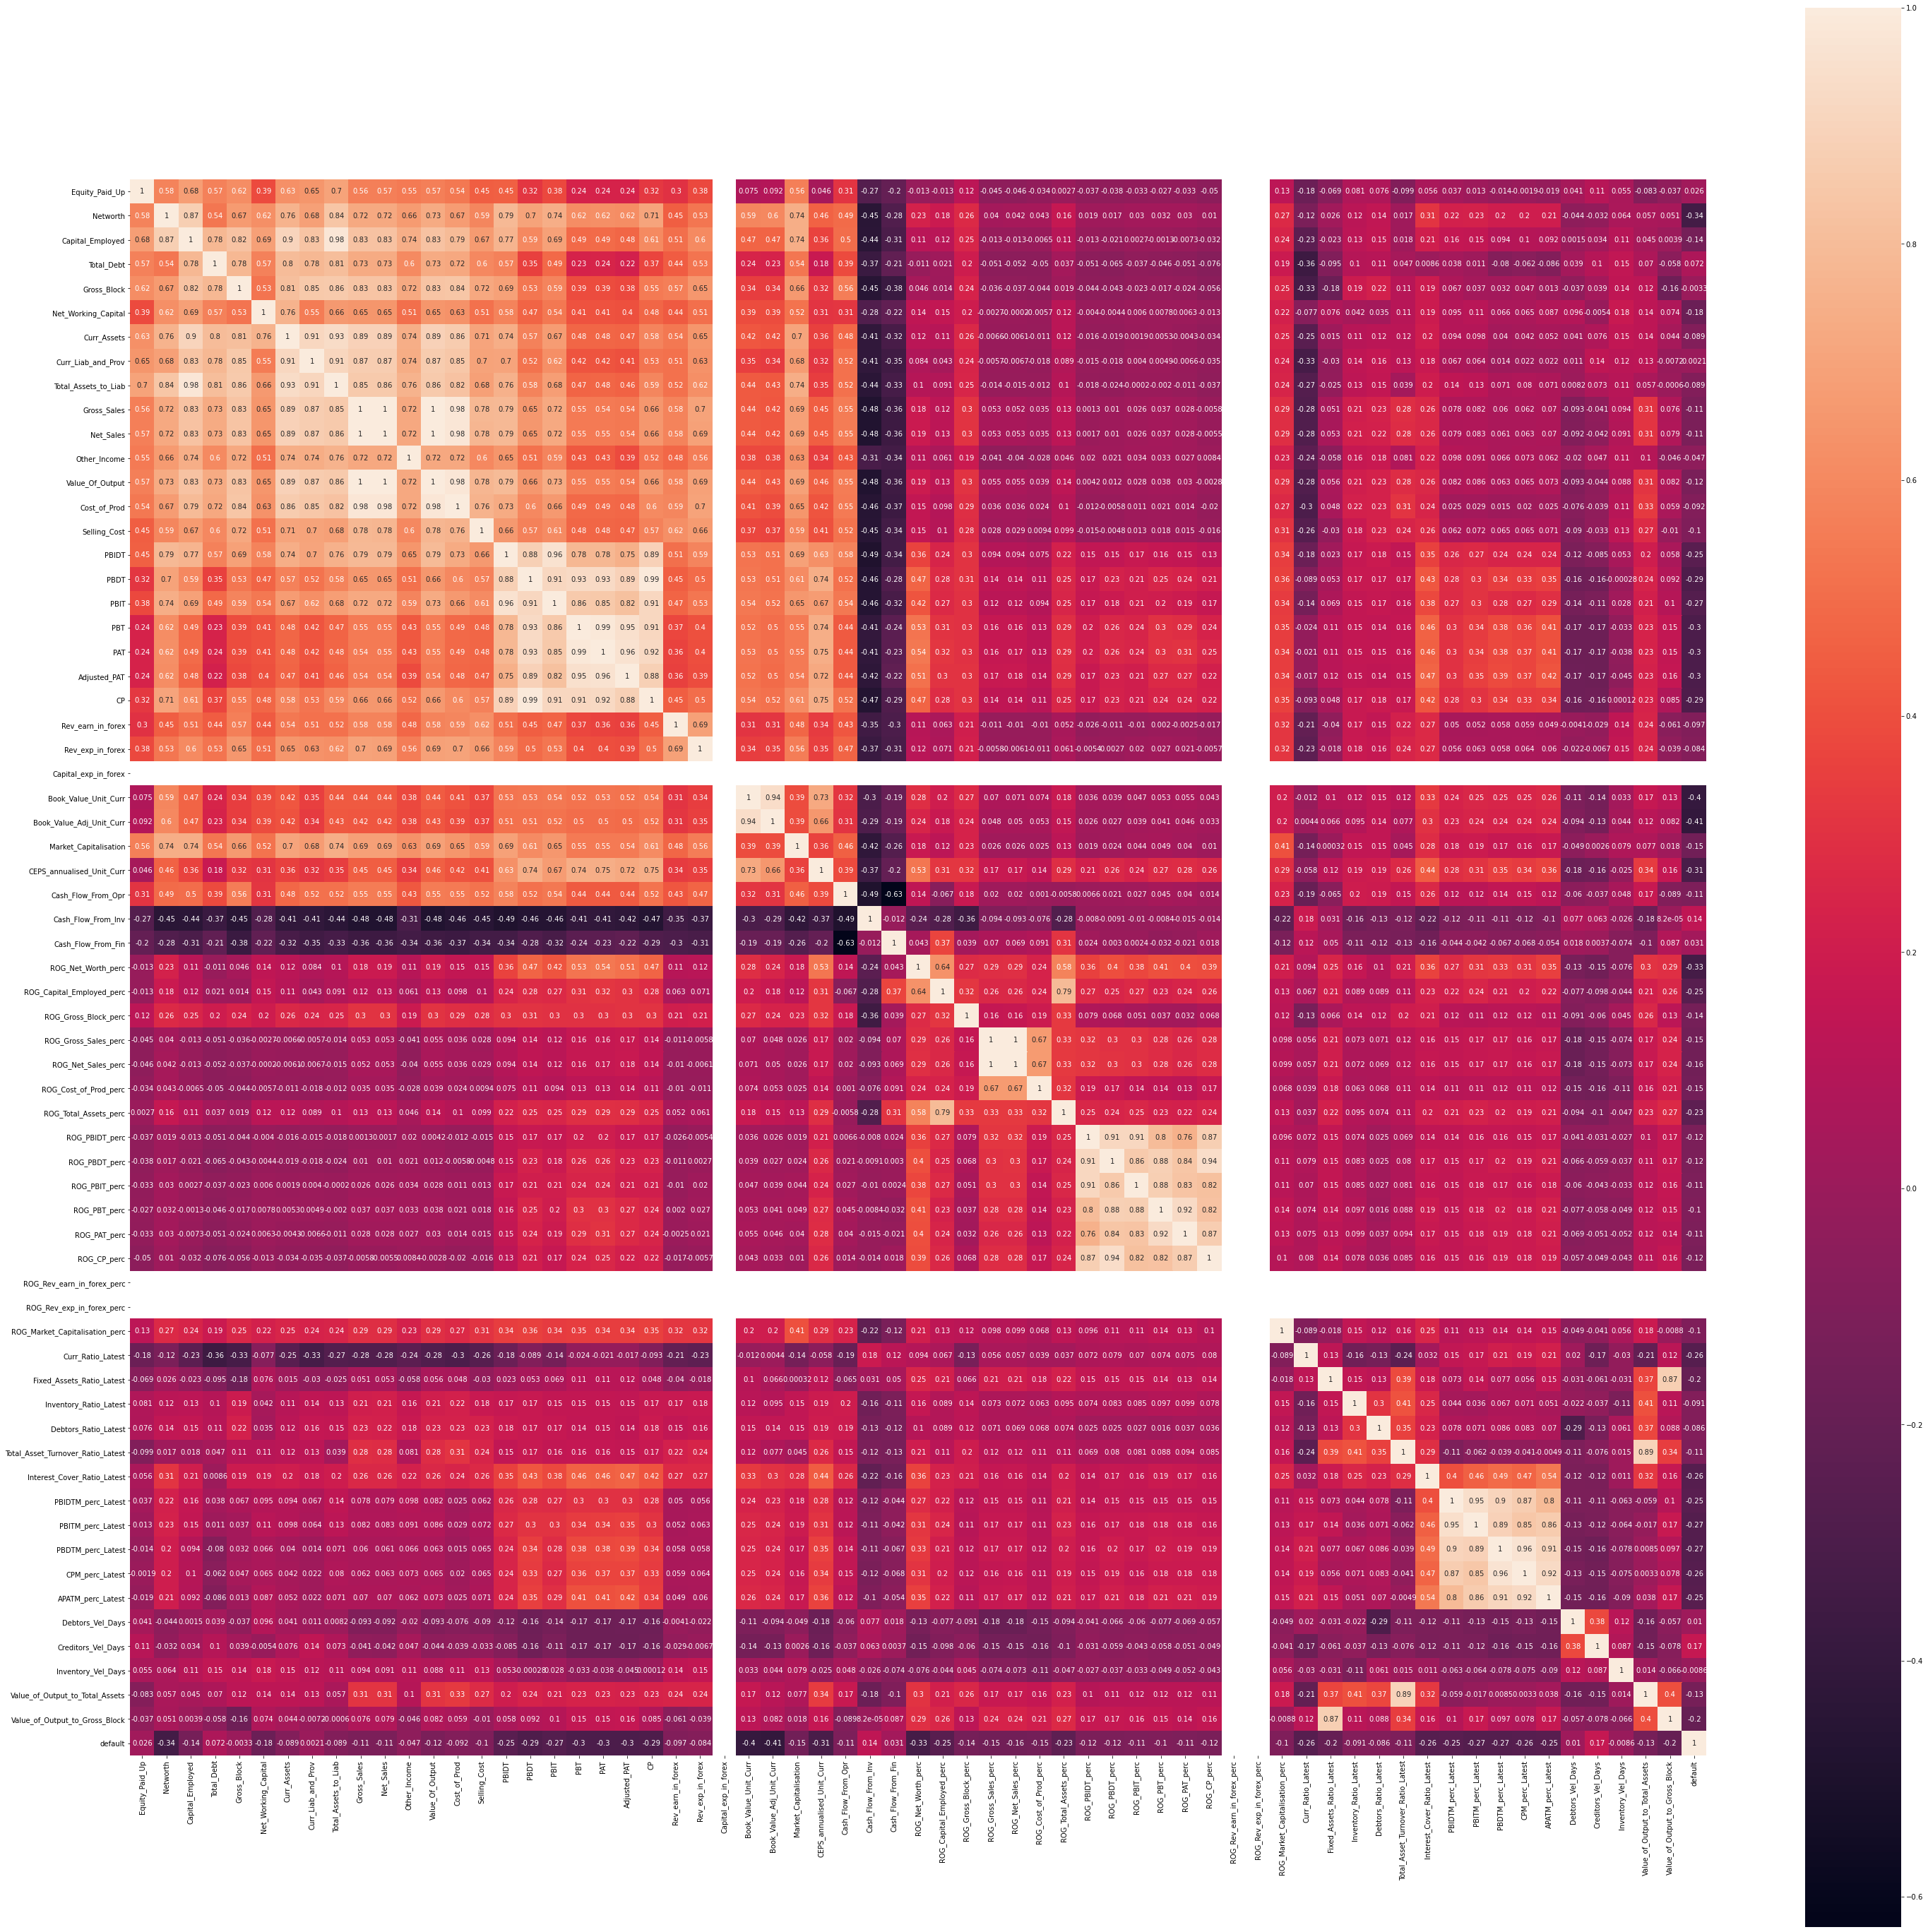

In [1034]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
p=sns.heatmap(df.corr(), annot=True, square=True)

### Calculating VIF

In [1035]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [1036]:
pd.set_option('display.max_rows', None)

In [1037]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
10,Net_Sales,1706.985568
9,Gross_Sales,977.400778
12,Value_Of_Output,691.500675
35,ROG_Gross_Sales_perc,542.389954
36,ROG_Net_Sales_perc,541.877682
16,PBDT,117.763864
8,Total_Assets_to_Liab,105.585213
21,CP,104.281389
19,PAT,76.905151
18,PBT,75.454532


#### Net_sales had the highest correlation of all the factors

In [1038]:
X1 = X.drop(columns=["Net_Sales"])
calc_vif(X1).sort_values(by = 'VIF', ascending = False)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
34,ROG_Gross_Sales_perc,526.487074
35,ROG_Net_Sales_perc,525.541394
9,Gross_Sales,420.573674
11,Value_Of_Output,406.027294
15,PBDT,117.741958
8,Total_Assets_to_Liab,104.955801
20,CP,104.254421
18,PAT,76.749678
17,PBT,75.309538
2,Capital_Employed,73.230703


In [1039]:
##ROG_Gross_Sales_perc had the second highest correlation after Net_sales

In [1040]:
X2 = X1.drop(columns=["ROG_Gross_Sales_perc"])
calc_vif(X2).sort_values(by = 'VIF', ascending = False)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
9,Gross_Sales,415.378563
11,Value_Of_Output,401.354380
15,PBDT,117.284448
8,Total_Assets_to_Liab,104.955695
20,CP,103.918628
18,PAT,76.611769
17,PBT,75.264990
2,Capital_Employed,73.216119
12,Cost_of_Prod,49.786853
6,Curr_Assets,33.180998


In [1041]:
X3 = X2.drop(columns=["Gross_Sales"])
calc_vif(X3).sort_values(by = 'VIF', ascending = False)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
14,PBDT,117.272655
8,Total_Assets_to_Liab,104.929950
19,CP,103.905099
17,PAT,76.571362
16,PBT,75.129110
2,Capital_Employed,73.209036
10,Value_Of_Output,58.661825
11,Cost_of_Prod,47.446707
6,Curr_Assets,33.169996
54,CPM_perc_Latest,32.945631


In [1042]:
X4 = X3.drop(columns=["PBDT"])
calc_vif(X4).sort_values(by = 'VIF', ascending = False)

C:\Users\yashs\anaconda3\New folder\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
8,Total_Assets_to_Liab,104.838117
2,Capital_Employed,73.114449
16,PAT,67.323339
10,Value_Of_Output,58.661179
15,PBT,55.156080
11,Cost_of_Prod,47.423024
6,Curr_Assets,33.146868
53,CPM_perc_Latest,32.941236
50,PBIDTM_perc_Latest,32.594506
13,PBIDT,32.083730


In [1043]:
X5=X4.drop(columns=["Capital_exp_in_forex","ROG_Rev_earn_in_forex_perc","ROG_Rev_exp_in_forex_perc"])
calc_vif(X5).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Total_Assets_to_Liab,104.838117
2,Capital_Employed,73.114449
16,PAT,67.323339
10,Value_Of_Output,58.661179
15,PBT,55.156080
11,Cost_of_Prod,47.423024
6,Curr_Assets,33.146868
50,CPM_perc_Latest,32.941236
47,PBIDTM_perc_Latest,32.594506
13,PBIDT,32.083730


In [1044]:
X6 = X5.drop(columns=["Total_Assets_to_Liab"])
calc_vif(X6).sort_values(by = 'VIF', ascending = False)

,variables,VIF
15,PAT,67.300996
9,Value_Of_Output,58.579080
14,PBT,55.126469
10,Cost_of_Prod,47.226507
49,CPM_perc_Latest,32.937383
46,PBIDTM_perc_Latest,32.502942
12,PBIDT,31.662727
6,Curr_Assets,31.170501
47,PBITM_perc_Latest,30.171906
13,PBIT,29.198549


In [1045]:
X7 = X6.drop(columns=["PAT"])
calc_vif(X7).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Value_Of_Output,58.450630
10,Cost_of_Prod,47.206250
48,CPM_perc_Latest,32.936942
45,PBIDTM_perc_Latest,32.502767
12,PBIDT,31.524442
6,Curr_Assets,31.169680
46,PBITM_perc_Latest,30.165423
13,PBIT,29.198464
47,PBDTM_perc_Latest,27.596813
33,ROG_PBDT_perc,24.368048


In [1046]:
X8 = X7.drop(columns=["Value_Of_Output","Cost_of_Prod"])
calc_vif(X8).sort_values(by = 'VIF', ascending = False)

,variables,VIF
46,CPM_perc_Latest,32.737879
43,PBIDTM_perc_Latest,32.206228
10,PBIDT,30.480819
44,PBITM_perc_Latest,29.963659
6,Curr_Assets,29.733510
11,PBIT,29.193459
45,PBDTM_perc_Latest,27.569837
31,ROG_PBDT_perc,24.363332
2,Capital_Employed,23.866718
12,PBT,21.666333


In [1047]:
X9 = X8.drop(columns=["CPM_perc_Latest"])
calc_vif(X9).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,PBIDT,30.474025
6,Curr_Assets,29.655348
11,PBIT,29.192599
43,PBIDTM_perc_Latest,25.408268
31,ROG_PBDT_perc,24.360415
2,Capital_Employed,23.863740
44,PBITM_perc_Latest,21.947153
12,PBT,21.612975
33,ROG_PBT_perc,18.966330
14,CP,18.503139


In [1048]:
X10 = X9.drop(columns=["PBIDT","Curr_Assets"])
calc_vif(X10).sort_values(by = 'VIF', ascending = False)

,variables,VIF
41,PBIDTM_perc_Latest,25.053114
29,ROG_PBDT_perc,24.234116
42,PBITM_perc_Latest,21.785628
2,Capital_Employed,21.292562
10,PBT,21.118974
31,ROG_PBT_perc,18.872594
33,ROG_CP_perc,17.852334
43,PBDTM_perc_Latest,17.650553
15,Book_Value_Unit_Curr,17.481336
12,CP,17.296982


In [1049]:
X10_vif=calc_vif(X10).sort_values(by = 'VIF', ascending = False)

In [1050]:
#X10_vif.loc[X10_vif["VIF"]>12,"variables"].to_list()

In [1051]:
#X11=X10.drop(columns=X10_vif.loc[X10_vif["VIF"]>10,"variables"].to_list())
#X11_vif=calc_vif(X11).sort_values(by="VIF",ascending=False)

In [1052]:
X10_vif

,variables,VIF
41,PBIDTM_perc_Latest,25.053114
29,ROG_PBDT_perc,24.234116
42,PBITM_perc_Latest,21.785628
2,Capital_Employed,21.292562
10,PBT,21.118974
31,ROG_PBT_perc,18.872594
33,ROG_CP_perc,17.852334
43,PBDTM_perc_Latest,17.650553
15,Book_Value_Unit_Curr,17.481336
12,CP,17.296982


In [1053]:
X10_vif.loc[X10_vif["VIF"]>5,"variables"].to_list()

['PBIDTM_perc_Latest',
 'ROG_PBDT_perc',
 'PBITM_perc_Latest',
 'Capital_Employed',
 'PBT',
 'ROG_PBT_perc',
 'ROG_CP_perc',
 'PBDTM_perc_Latest',
 'Book_Value_Unit_Curr',
 'CP',
 'ROG_PBIDT_perc',
 'Adjusted_PAT',
 'ROG_PAT_perc',
 'Book_Value_Adj_Unit_Curr',
 'PBIT',
 'Value_of_Output_to_Total_Assets',
 'ROG_PBIT_perc',
 'Networth',
 'Total_Asset_Turnover_Ratio_Latest',
 'Gross_Block',
 'APATM_perc_Latest',
 'Curr_Liab_and_Prov',
 'Value_of_Output_to_Gross_Block',
 'Fixed_Assets_Ratio_Latest',
 'Total_Debt',
 'CEPS_annualised_Unit_Curr']

In [1054]:
X11=X10.drop(columns=X10_vif.loc[X10_vif["VIF"]>5,"variables"].to_list())
X11_vif=calc_vif(X11).sort_values(by="VIF",ascending=False)
X11_vif

,variables,VIF
11,ROG_Capital_Employed_perc,3.824791
3,Selling_Cost,3.824410
6,Market_Capitalisation,3.725552
5,Rev_exp_in_forex,3.587639
7,Cash_Flow_From_Opr,3.505952
2,Other_Income,3.422626
0,Equity_Paid_Up,3.264988
15,ROG_Total_Assets_perc,3.203108
4,Rev_earn_in_forex,3.013132
9,Cash_Flow_From_Fin,2.806688


In [1055]:
len(X11.columns)

24

In [1056]:
list(X11.columns)

['Equity_Paid_Up',
 'Net_Working_Capital',
 'Other_Income',
 'Selling_Cost',
 'Rev_earn_in_forex',
 'Rev_exp_in_forex',
 'Market_Capitalisation',
 'Cash_Flow_From_Opr',
 'Cash_Flow_From_Inv',
 'Cash_Flow_From_Fin',
 'ROG_Net_Worth_perc',
 'ROG_Capital_Employed_perc',
 'ROG_Gross_Block_perc',
 'ROG_Net_Sales_perc',
 'ROG_Cost_of_Prod_perc',
 'ROG_Total_Assets_perc',
 'ROG_Market_Capitalisation_perc',
 'Curr_Ratio_Latest',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'Debtors_Vel_Days',
 'Creditors_Vel_Days',
 'Inventory_Vel_Days']

### Modeling

In [1057]:
X_train,X_test,Y_train,Y_test = train_test_split(X11,Y,test_size = 0.33, random_state = 42,stratify=Y)

In [1058]:
df_train = pd.concat([X_train,Y_train],axis=1)
df_test = pd.concat([X_test,Y_test],axis=1)

In [1059]:
def logistic_reg(df_train,features):
    features=list(features)
    formula = "default ~" + "+".join(list(df_train.drop("default",axis=1).columns))
    model=SM.logit(formula=formula,data=df_train).fit()
    return model.summary()

In [1060]:
logistic_reg(df_train,X_train.columns)

Optimization terminated successfully.
         Current function value: 0.206815
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           24
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.3954
Time:                        19:23:33   Log-Likelihood:                -496.56
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.077e-121
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.7085      0.184     -3.859      0.000      -1.068      -0.349
Equity_Paid_Up                     0.0161      0.008      2.093      0.036       0.001       0.031
Net_Working_Capital               -0.0074      0.002     -3.677      0.000      -0.011      -0.003
Other_Income                       0.0445      0.039      1.151      0.250      -0.031       0.120
Selling_Cost                       0.0262      0.045      0.586      0.558      -0.061       0.114
Rev_earn_in_forex                 -0.0271      0.019     -1.396      0.163      -0.065       0.011
Rev_exp_in_forex                   0.0472      0.020      2.324      0.020       0.007       0.087
Market_Capitalisation             -0.0099      0.002     -5.204      0.000      -0.014      -0.006
Cash_Flow_From_Opr                -0.0172      0.013     -1.304      0.192      -0.043       0.009
Cash_Flow_From_Inv                -0.0010      0.026     -0.039      0.969      -0.052       0.050
Cash_Flow_From_Fin                -0.0125      0.023     -0.549      0.583      -0.057       0.032
ROG_Net_Worth_perc                -0.0465      0.009     -5.324      0.000      -0.064      -0.029
ROG_Capital_Employed_perc          0.0026      0.008      0.316      0.752      -0.013       0.019
ROG_Gross_Block_perc              -0.0344      0.015     -2.316      0.021      -0.063      -0.005
ROG_Net_Sales_perc                -0.0003      0.003     -0.102      0.919      -0.007       0.006
ROG_Cost_of_Prod_perc             -0.0079      0.003     -2.463      0.014      -0.014      -0.002
ROG_Total_Assets_perc             -0.0120      0.008     -1.493      0.136      -0.028       0.004
ROG_Market_Capitalisation_perc     0.0005      0.002      0.251      0.802      -0.004       0.005
Curr_Ratio_Latest                 -0.6355      0.076     -8.344      0.000      -0.785      -0.486
Inventory_Ratio_Latest            -0.0162      0.014     -1.153      0.249      -0.044       0.011
Debtors_Ratio_Latest              -0.0231      0.015     -1.510      0.131      -0.053       0.007
Interest_Cover_Ratio_Latest       -0.2043      0.033     -6.229      0.000      -0.269      -0.140
Debtors_Vel_Days                  -0.0033      0.001     -3.141      0.002      -0.005      -0.001
Creditors_Vel_Days                 0.0034      0.001      2.966      0.003       0.001       0.006
Inventory_Vel_Days                -0.0016      0.001     -1.290      0.197      -0.004       0.001
==================================================================================================
"""

In [1061]:
formula = "default ~" + "+".join(list(df_train.drop("default",axis=1).columns))
model1=SM.logit(formula=formula,data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.206815
         Iterations 8


In [1062]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           24
Date:                Sun, 03 Apr 2022   Pseudo R-squ.:                  0.3954
Time:                        19:24:03   Log-Likelihood:                -496.56
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.077e-121
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.7085      0.184     -3.859      0.000      -1.068      -0.349
Equity_Paid_Up                     0.0161      0.008      2.093      0.

In [1065]:
significance(model1)

['Other_Income',
 'Selling_Cost',
 'Rev_earn_in_forex',
 'Cash_Flow_From_Opr',
 'Cash_Flow_From_Inv',
 'Cash_Flow_From_Fin',
 'ROG_Capital_Employed_perc',
 'ROG_Net_Sales_perc',
 'ROG_Total_Assets_perc',
 'ROG_Market_Capitalisation_perc',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Inventory_Vel_Days']

In [1063]:
def significance(model):
    coef_table =pd.read_html(model.summary2().as_html())[1]
    coef_table.drop(0,axis=0,inplace=True)
    coef_table.columns = ["var_name","coef","std_err","t_stat","p_val","cof_25","conf_975"]
    coef_table["p_val"]=coef_table["p_val"].astype("float")
    coef_table.sort_values(by="p_val",ascending=False)
    sig_features = list(coef_table.loc[coef_table["p_val"] <= 0.05, "var_name"].values)
    sig_features = [x for x in sig_features if x != "Intercept"]
    in_sig_features = list(coef_table.loc[coef_table["p_val"] >= 0.05, "var_name"].values)
    in_sig_features = [x for x in in_sig_features if x != "Intercept"]
    return in_sig_features

In [1064]:
def significance2(model):
    coef_table =pd.read_html(model.summary2().as_html())[1]
    coef_table.drop(0,axis=0,inplace=True)
    coef_table.columns = ["var_name","coef","std_err","t_stat","p_val","cof_25","conf_975"]
    coef_table["p_val"]=coef_table["p_val"].astype("float")
    coef_table.sort_values(by="p_val",ascending=False)
    sig_features = list(coef_table.loc[coef_table["p_val"] <= 0.05, "var_name"].values)
    sig_features = [x for x in sig_features if x != "Intercept"]
    return sig_features

In [601]:
in_sig_features1=significance(model1)

In [602]:
len(in_sig_features1)

13

### Model 2

In [603]:
formula2 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv"],axis=1).columns))

In [604]:
model2 = SM.logit(formula=formula2,data=df_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.206815
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           23
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3954
Time:                        17:16:51   Log-Likelihood:                -496.56
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                2.003e-122
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.7081      0.183     -3.864      0.000      -1.067      -0.349
Equity_Paid_Up                     0.0161      0.008      2.093      0.036       0.001       0.031
Net_Working_Capital               -0.0074      0.002     -3.678      0.000      -0.011      -0.003
Other_Income                       0.0444      0.039      1.151      0.250      -0.031       0.120
Selling_Cost                       0.0265      0.044      0.606      0.544      -0.059       0.112
Rev_earn_in_forex                 -0.0272      0.019     -1.397      0.162      -0.065       0.011
Rev_exp_in_forex                   0.0472      0.020      2.326      0.020       0.007       0.087
Market_Capitalisation             -0.0099      0.002     -5.222      0.000      -0.014      -0.006
Cash_Flow_From_Opr                -0.0169      0.010     -1.637      0.102      -0.037       0.003
Cash_Flow_From_Fin                -0.0121      0.019     -0.625      0.532      -0.050       0.026
ROG_Net_Worth_perc                -0.0465      0.009     -5.324      0.000      -0.064      -0.029
ROG_Capital_Employed_perc          0.0026      0.008      0.317      0.752      -0.013       0.019
ROG_Gross_Block_perc              -0.0343      0.015     -2.341      0.019      -0.063      -0.006
ROG_Net_Sales_perc                -0.0003      0.003     -0.102      0.919      -0.007       0.006
ROG_Cost_of_Prod_perc             -0.0079      0.003     -2.463      0.014      -0.014      -0.002
ROG_Total_Assets_perc             -0.0120      0.008     -1.492      0.136      -0.028       0.004
ROG_Market_Capitalisation_perc     0.0005      0.002      0.250      0.802      -0.004       0.005
Curr_Ratio_Latest                 -0.6356      0.076     -8.345      0.000      -0.785      -0.486
Inventory_Ratio_Latest            -0.0162      0.014     -1.155      0.248      -0.044       0.011
Debtors_Ratio_Latest              -0.0231      0.015     -1.510      0.131      -0.053       0.007
Interest_Cover_Ratio_Latest       -0.2042      0.033     -6.240      0.000      -0.268      -0.140
Debtors_Vel_Days                  -0.0033      0.001     -3.142      0.002      -0.005      -0.001
Creditors_Vel_Days                 0.0034      0.001      2.970      0.003       0.001       0.006
Inventory_Vel_Days                -0.0016      0.001     -1.289      0.197      -0.004       0.001
==================================================================================================
"""

In [605]:
in_sig_features2=significance(model2)

In [606]:
in_sig_features2

['Other_Income',
 'Selling_Cost',
 'Rev_earn_in_forex',
 'Cash_Flow_From_Opr',
 'Cash_Flow_From_Fin',
 'ROG_Capital_Employed_perc',
 'ROG_Net_Sales_perc',
 'ROG_Total_Assets_perc',
 'ROG_Market_Capitalisation_perc',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Inventory_Vel_Days']

In [607]:
len(in_sig_features2)

12

### Model 3

In [608]:
formula3 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc"],axis=1).columns))

In [609]:
model3 = SM.logit(formula=formula3,data=df_train).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.206817
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           22
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3953
Time:                        17:16:52   Log-Likelihood:                -496.57
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                3.658e-123
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.7092      0.183     -3.876      0.000      -1.068      -0.351
Equity_Paid_Up                     0.0160      0.008      2.092      0.036       0.001       0.031
Net_Working_Capital               -0.0074      0.002     -3.681      0.000      -0.011      -0.003
Other_Income                       0.0446      0.039      1.158      0.247      -0.031       0.120
Selling_Cost                       0.0264      0.044      0.603      0.547      -0.059       0.112
Rev_earn_in_forex                 -0.0271      0.019     -1.395      0.163      -0.065       0.011
Rev_exp_in_forex                   0.0472      0.020      2.331      0.020       0.008       0.087
Market_Capitalisation             -0.0099      0.002     -5.222      0.000      -0.014      -0.006
Cash_Flow_From_Opr                -0.0169      0.010     -1.640      0.101      -0.037       0.003
Cash_Flow_From_Fin                -0.0121      0.019     -0.625      0.532      -0.050       0.026
ROG_Net_Worth_perc                -0.0466      0.009     -5.364      0.000      -0.064      -0.030
ROG_Capital_Employed_perc          0.0026      0.008      0.317      0.751      -0.013       0.019
ROG_Gross_Block_perc              -0.0343      0.015     -2.340      0.019      -0.063      -0.006
ROG_Cost_of_Prod_perc             -0.0081      0.003     -3.116      0.002      -0.013      -0.003
ROG_Total_Assets_perc             -0.0120      0.008     -1.501      0.133      -0.028       0.004
ROG_Market_Capitalisation_perc     0.0005      0.002      0.245      0.806      -0.004       0.005
Curr_Ratio_Latest                 -0.6356      0.076     -8.343      0.000      -0.785      -0.486
Inventory_Ratio_Latest            -0.0162      0.014     -1.155      0.248      -0.044       0.011
Debtors_Ratio_Latest              -0.0231      0.015     -1.508      0.131      -0.053       0.007
Interest_Cover_Ratio_Latest       -0.2042      0.033     -6.244      0.000      -0.268      -0.140
Debtors_Vel_Days                  -0.0033      0.001     -3.145      0.002      -0.005      -0.001
Creditors_Vel_Days                 0.0034      0.001      2.971      0.003       0.001       0.006
Inventory_Vel_Days                -0.0016      0.001     -1.292      0.196      -0.004       0.001
==================================================================================================
"""

In [610]:
in_sig_features3=significance(model3)

In [611]:
len(in_sig_features3)

11

### Model 4

In [612]:
formula4 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc"],axis=1).columns))

In [613]:
model4 = SM.logit(formula=formula4,data=df_train).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.206830
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           21
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3953
Time:                        17:16:52   Log-Likelihood:                -496.60
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                6.683e-124
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7060      0.182     -3.870      0.000      -1.064      -0.348
Equity_Paid_Up                  0.0159      0.008      2.081      0.037       0.001       0.031
Net_Working_Capital            -0.0074      0.002     -3.693      0.000      -0.011      -0.003
Other_Income                    0.0440      0.038      1.144      0.253      -0.031       0.119
Selling_Cost                    0.0262      0.044      0.599      0.549      -0.060       0.112
Rev_earn_in_forex              -0.0268      0.019     -1.381      0.167      -0.065       0.011
Rev_exp_in_forex                0.0476      0.020      2.356      0.018       0.008       0.087
Market_Capitalisation          -0.0098      0.002     -5.272      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0169      0.010     -1.644      0.100      -0.037       0.003
Cash_Flow_From_Fin             -0.0123      0.019     -0.640      0.522      -0.050       0.025
ROG_Net_Worth_perc             -0.0465      0.009     -5.360      0.000      -0.064      -0.030
ROG_Capital_Employed_perc       0.0026      0.008      0.317      0.751      -0.013       0.019
ROG_Gross_Block_perc           -0.0344      0.015     -2.348      0.019      -0.063      -0.006
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.114      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0119      0.008     -1.489      0.137      -0.028       0.004
Curr_Ratio_Latest              -0.6359      0.076     -8.350      0.000      -0.785      -0.487
Inventory_Ratio_Latest         -0.0160      0.014     -1.140      0.254      -0.043       0.011
Debtors_Ratio_Latest           -0.0230      0.015     -1.502      0.133      -0.053       0.007
Interest_Cover_Ratio_Latest    -0.2043      0.033     -6.242      0.000      -0.268      -0.140
Debtors_Vel_Days               -0.0033      0.001     -3.148      0.002      -0.005      -0.001
Creditors_Vel_Days              0.0034      0.001      2.967      0.003       0.001       0.006
Inventory_Vel_Days             -0.0016      0.001     -1.289      0.198      -0.004       0.001
===============================================================================================
"""

In [614]:
in_sig_features4=significance(model4)
len(in_sig_features4)

10

### Model 5

In [615]:
formula5 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc"],axis=1).columns))

In [616]:
model5 = SM.logit(formula=formula5,data=df_train).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.206850
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           20
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3952
Time:                        17:16:52   Log-Likelihood:                -496.65
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.214e-124
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7038      0.182     -3.860      0.000      -1.061      -0.346
Equity_Paid_Up                  0.0158      0.008      2.063      0.039       0.001       0.031
Net_Working_Capital            -0.0073      0.002     -3.684      0.000      -0.011      -0.003
Other_Income                    0.0447      0.038      1.165      0.244      -0.031       0.120
Selling_Cost                    0.0268      0.044      0.615      0.539      -0.059       0.112
Rev_earn_in_forex              -0.0266      0.019     -1.373      0.170      -0.065       0.011
Rev_exp_in_forex                0.0476      0.020      2.354      0.019       0.008       0.087
Market_Capitalisation          -0.0098      0.002     -5.266      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0171      0.010     -1.663      0.096      -0.037       0.003
Cash_Flow_From_Fin             -0.0111      0.019     -0.587      0.557      -0.048       0.026
ROG_Net_Worth_perc             -0.0455      0.008     -5.678      0.000      -0.061      -0.030
ROG_Gross_Block_perc           -0.0343      0.015     -2.338      0.019      -0.063      -0.006
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.128      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0105      0.007     -1.588      0.112      -0.023       0.002
Curr_Ratio_Latest              -0.6361      0.076     -8.351      0.000      -0.785      -0.487
Inventory_Ratio_Latest         -0.0161      0.014     -1.150      0.250      -0.044       0.011
Debtors_Ratio_Latest           -0.0229      0.015     -1.495      0.135      -0.053       0.007
Interest_Cover_Ratio_Latest    -0.2035      0.033     -6.240      0.000      -0.267      -0.140
Debtors_Vel_Days               -0.0033      0.001     -3.138      0.002      -0.005      -0.001
Creditors_Vel_Days              0.0034      0.001      2.965      0.003       0.001       0.006
Inventory_Vel_Days             -0.0016      0.001     -1.297      0.195      -0.004       0.001
===============================================================================================
"""

In [617]:
in_sig_features5=significance(model5)
len(in_sig_features5)

9

### Model 6

In [618]:
formula6 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost"],axis=1).columns))

In [619]:
model6 = SM.logit(formula=formula6,data=df_train).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.206929
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           19
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3950
Time:                        17:16:52   Log-Likelihood:                -496.84
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                2.459e-125
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7042      0.182     -3.862      0.000      -1.062      -0.347
Equity_Paid_Up                  0.0166      0.008      2.217      0.027       0.002       0.031
Net_Working_Capital            -0.0071      0.002     -3.634      0.000      -0.011      -0.003
Other_Income                    0.0465      0.038      1.216      0.224      -0.028       0.121
Rev_earn_in_forex              -0.0234      0.019     -1.256      0.209      -0.060       0.013
Rev_exp_in_forex                0.0504      0.020      2.563      0.010       0.012       0.089
Market_Capitalisation          -0.0096      0.002     -5.252      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0168      0.010     -1.633      0.103      -0.037       0.003
Cash_Flow_From_Fin             -0.0121      0.019     -0.644      0.520      -0.049       0.025
ROG_Net_Worth_perc             -0.0456      0.008     -5.704      0.000      -0.061      -0.030
ROG_Gross_Block_perc           -0.0334      0.015     -2.291      0.022      -0.062      -0.005
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.125      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0102      0.007     -1.550      0.121      -0.023       0.003
Curr_Ratio_Latest              -0.6381      0.076     -8.372      0.000      -0.788      -0.489
Inventory_Ratio_Latest         -0.0155      0.014     -1.113      0.266      -0.043       0.012
Debtors_Ratio_Latest           -0.0220      0.015     -1.445      0.148      -0.052       0.008
Interest_Cover_Ratio_Latest    -0.2033      0.033     -6.228      0.000      -0.267      -0.139
Debtors_Vel_Days               -0.0034      0.001     -3.195      0.001      -0.005      -0.001
Creditors_Vel_Days              0.0033      0.001      2.938      0.003       0.001       0.006
Inventory_Vel_Days             -0.0016      0.001     -1.289      0.197      -0.004       0.001
===============================================================================================
"""

In [620]:
in_sig_features6=significance(model6)
len(in_sig_features6)

8

### Model 7

In [621]:
formula7 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin"],axis=1).columns))

In [622]:
model7 = SM.logit(formula=formula7,data=df_train).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.207015
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           18
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3948
Time:                        17:16:52   Log-Likelihood:                -497.04
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                4.939e-126
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7053      0.182     -3.869      0.000      -1.063      -0.348
Equity_Paid_Up                  0.0166      0.008      2.209      0.027       0.002       0.031
Net_Working_Capital            -0.0071      0.002     -3.615      0.000      -0.011      -0.003
Other_Income                    0.0502      0.038      1.330      0.184      -0.024       0.124
Rev_earn_in_forex              -0.0228      0.019     -1.232      0.218      -0.059       0.014
Rev_exp_in_forex                0.0501      0.020      2.549      0.011       0.012       0.089
Market_Capitalisation          -0.0097      0.002     -5.300      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0125      0.008     -1.602      0.109      -0.028       0.003
ROG_Net_Worth_perc             -0.0454      0.008     -5.683      0.000      -0.061      -0.030
ROG_Gross_Block_perc           -0.0334      0.015     -2.297      0.022      -0.062      -0.005
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.122      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0113      0.006     -1.784      0.074      -0.024       0.001
Curr_Ratio_Latest              -0.6388      0.076     -8.376      0.000      -0.788      -0.489
Inventory_Ratio_Latest         -0.0153      0.014     -1.095      0.274      -0.043       0.012
Debtors_Ratio_Latest           -0.0220      0.015     -1.446      0.148      -0.052       0.008
Interest_Cover_Ratio_Latest    -0.2030      0.033     -6.223      0.000      -0.267      -0.139
Debtors_Vel_Days               -0.0034      0.001     -3.218      0.001      -0.005      -0.001
Creditors_Vel_Days              0.0034      0.001      2.963      0.003       0.001       0.006
Inventory_Vel_Days             -0.0015      0.001     -1.250      0.211      -0.004       0.001
===============================================================================================
"""

In [623]:
in_sig_features7=significance(model7)
in_sig_features7

['Other_Income',
 'Rev_earn_in_forex',
 'Cash_Flow_From_Opr',
 'ROG_Total_Assets_perc',
 'Inventory_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Inventory_Vel_Days']

In [624]:
len(in_sig_features7)

7

### Model 8

In [625]:
formula8 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest"],axis=1).columns))

In [626]:
model8 = SM.logit(formula=formula8,data=df_train).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.207270
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           17
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3940
Time:                        17:16:52   Log-Likelihood:                -497.66
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.429e-126
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7276      0.182     -4.007      0.000      -1.083      -0.372
Equity_Paid_Up                  0.0164      0.008      2.185      0.029       0.002       0.031
Net_Working_Capital            -0.0069      0.002     -3.550      0.000      -0.011      -0.003
Other_Income                    0.0503      0.038      1.332      0.183      -0.024       0.124
Rev_earn_in_forex              -0.0231      0.019     -1.250      0.211      -0.059       0.013
Rev_exp_in_forex                0.0484      0.020      2.471      0.013       0.010       0.087
Market_Capitalisation          -0.0097      0.002     -5.334      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0132      0.008     -1.702      0.089      -0.028       0.002
ROG_Net_Worth_perc             -0.0453      0.008     -5.695      0.000      -0.061      -0.030
ROG_Gross_Block_perc           -0.0339      0.014     -2.341      0.019      -0.062      -0.006
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.122      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0113      0.006     -1.788      0.074      -0.024       0.001
Curr_Ratio_Latest              -0.6419      0.077     -8.353      0.000      -0.792      -0.491
Debtors_Ratio_Latest           -0.0284      0.014     -1.997      0.046      -0.056      -0.001
Interest_Cover_Ratio_Latest    -0.2039      0.033     -6.268      0.000      -0.268      -0.140
Debtors_Vel_Days               -0.0036      0.001     -3.428      0.001      -0.006      -0.002
Creditors_Vel_Days              0.0034      0.001      2.979      0.003       0.001       0.006
Inventory_Vel_Days             -0.0014      0.001     -1.127      0.260      -0.004       0.001
===============================================================================================
"""

In [627]:
in_sig_features8=significance(model8)
in_sig_features8

['Other_Income',
 'Rev_earn_in_forex',
 'Cash_Flow_From_Opr',
 'ROG_Total_Assets_perc',
 'Inventory_Vel_Days']

### Model 9

In [628]:
formula9 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days"],axis=1).columns))

In [629]:
model9 = SM.logit(formula=formula9,data=df_train).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.207538
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           16
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3932
Time:                        17:16:52   Log-Likelihood:                -498.30
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                4.148e-127
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7567      0.180     -4.204      0.000      -1.109      -0.404
Equity_Paid_Up                  0.0170      0.007      2.261      0.024       0.002       0.032
Net_Working_Capital            -0.0071      0.002     -3.644      0.000      -0.011      -0.003
Other_Income                    0.0484      0.038      1.286      0.198      -0.025       0.122
Rev_earn_in_forex              -0.0257      0.018     -1.399      0.162      -0.062       0.010
Rev_exp_in_forex                0.0479      0.020      2.451      0.014       0.010       0.086
Market_Capitalisation          -0.0097      0.002     -5.324      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0131      0.008     -1.691      0.091      -0.028       0.002
ROG_Net_Worth_perc             -0.0446      0.008     -5.641      0.000      -0.060      -0.029
ROG_Gross_Block_perc           -0.0343      0.014     -2.378      0.017      -0.062      -0.006
ROG_Cost_of_Prod_perc          -0.0078      0.003     -3.031      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0113      0.006     -1.788      0.074      -0.024       0.001
Curr_Ratio_Latest              -0.6463      0.077     -8.365      0.000      -0.798      -0.495
Debtors_Ratio_Latest           -0.0307      0.014     -2.173      0.030      -0.058      -0.003
Interest_Cover_Ratio_Latest    -0.2023      0.032     -6.237      0.000      -0.266      -0.139
Debtors_Vel_Days               -0.0037      0.001     -3.607      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0033      0.001      2.886      0.004       0.001       0.005
===============================================================================================
"""

In [630]:
in_sig_features9=significance(model9)
in_sig_features9

['Other_Income',
 'Rev_earn_in_forex',
 'Cash_Flow_From_Opr',
 'ROG_Total_Assets_perc']

### Model 10

In [631]:
formula10 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days","Other_Income"],axis=1).columns))

In [632]:
model10 = SM.logit(formula=formula10,data=df_train).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.207878
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           15
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3922
Time:                        17:16:53   Log-Likelihood:                -499.12
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.381e-127
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7631      0.180     -4.239      0.000      -1.116      -0.410
Equity_Paid_Up                  0.0192      0.007      2.645      0.008       0.005       0.034
Net_Working_Capital            -0.0067      0.002     -3.470      0.001      -0.010      -0.003
Rev_earn_in_forex              -0.0241      0.018     -1.315      0.188      -0.060       0.012
Rev_exp_in_forex                0.0511      0.019      2.638      0.008       0.013       0.089
Market_Capitalisation          -0.0090      0.002     -5.200      0.000      -0.012      -0.006
Cash_Flow_From_Opr             -0.0131      0.008     -1.674      0.094      -0.028       0.002
ROG_Net_Worth_perc             -0.0448      0.008     -5.620      0.000      -0.060      -0.029
ROG_Gross_Block_perc           -0.0334      0.014     -2.317      0.020      -0.062      -0.005
ROG_Cost_of_Prod_perc          -0.0079      0.003     -3.071      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0114      0.006     -1.806      0.071      -0.024       0.001
Curr_Ratio_Latest              -0.6524      0.077     -8.428      0.000      -0.804      -0.501
Debtors_Ratio_Latest           -0.0288      0.014     -2.054      0.040      -0.056      -0.001
Interest_Cover_Ratio_Latest    -0.2004      0.032     -6.189      0.000      -0.264      -0.137
Debtors_Vel_Days               -0.0037      0.001     -3.562      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0034      0.001      2.997      0.003       0.001       0.006
===============================================================================================
"""

In [633]:
in_sig_features10=significance(model10)
in_sig_features10

['Rev_earn_in_forex', 'Cash_Flow_From_Opr', 'ROG_Total_Assets_perc']

### Model 11

In [634]:
formula11 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days","Other_Income","Rev_earn_in_forex"],axis=1).columns))

In [635]:
model11 = SM.logit(formula=formula11,data=df_train).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.208248
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           14
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3912
Time:                        17:16:53   Log-Likelihood:                -500.00
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                4.771e-128
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7728      0.180     -4.289      0.000      -1.126      -0.420
Equity_Paid_Up                  0.0189      0.007      2.597      0.009       0.005       0.033
Net_Working_Capital            -0.0070      0.002     -3.642      0.000      -0.011      -0.003
Rev_exp_in_forex                0.0393      0.017      2.273      0.023       0.005       0.073
Market_Capitalisation          -0.0091      0.002     -5.232      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0147      0.008     -1.906      0.057      -0.030       0.000
ROG_Net_Worth_perc             -0.0446      0.008     -5.601      0.000      -0.060      -0.029
ROG_Gross_Block_perc           -0.0345      0.014     -2.383      0.017      -0.063      -0.006
ROG_Cost_of_Prod_perc          -0.0079      0.003     -3.057      0.002      -0.013      -0.003
ROG_Total_Assets_perc          -0.0115      0.006     -1.829      0.067      -0.024       0.001
Curr_Ratio_Latest              -0.6517      0.078     -8.395      0.000      -0.804      -0.500
Debtors_Ratio_Latest           -0.0300      0.014     -2.139      0.032      -0.057      -0.003
Interest_Cover_Ratio_Latest    -0.2005      0.032     -6.211      0.000      -0.264      -0.137
Debtors_Vel_Days               -0.0038      0.001     -3.624      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0035      0.001      3.055      0.002       0.001       0.006
===============================================================================================
"""

In [636]:
in_sig_features11=significance(model11)
in_sig_features11

['Cash_Flow_From_Opr', 'ROG_Total_Assets_perc']

### Model 12

In [637]:
formula12 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days","Other_Income","Rev_earn_in_forex","ROG_Total_Assets_perc"],axis=1).columns))

In [638]:
model12 = SM.logit(formula=formula12,data=df_train).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.208954
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           13
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3891
Time:                        17:16:54   Log-Likelihood:                -501.70
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                3.516e-128
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7879      0.180     -4.378      0.000      -1.141      -0.435
Equity_Paid_Up                  0.0198      0.007      2.742      0.006       0.006       0.034
Net_Working_Capital            -0.0073      0.002     -3.831      0.000      -0.011      -0.004
Rev_exp_in_forex                0.0386      0.017      2.235      0.025       0.005       0.072
Market_Capitalisation          -0.0093      0.002     -5.369      0.000      -0.013      -0.006
Cash_Flow_From_Opr             -0.0138      0.008     -1.795      0.073      -0.029       0.001
ROG_Net_Worth_perc             -0.0509      0.007     -7.031      0.000      -0.065      -0.037
ROG_Gross_Block_perc           -0.0401      0.014     -2.855      0.004      -0.068      -0.013
ROG_Cost_of_Prod_perc          -0.0081      0.003     -3.133      0.002      -0.013      -0.003
Curr_Ratio_Latest              -0.6462      0.077     -8.344      0.000      -0.798      -0.494
Debtors_Ratio_Latest           -0.0292      0.014     -2.091      0.037      -0.057      -0.002
Interest_Cover_Ratio_Latest    -0.2022      0.032     -6.258      0.000      -0.266      -0.139
Debtors_Vel_Days               -0.0037      0.001     -3.547      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0035      0.001      3.055      0.002       0.001       0.006
===============================================================================================
"""

In [639]:
in_sig_features12=significance(model12)
in_sig_features12

['Cash_Flow_From_Opr']

### Model 13

In [640]:
formula13 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days","Other_Income","Rev_earn_in_forex","ROG_Total_Assets_perc","Cash_Flow_From_Opr"],axis=1).columns))

In [641]:
model13 = SM.logit(formula=formula13,data=df_train).fit()
model13.summary()

Optimization terminated successfully.
         Current function value: 0.209630
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           12
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3871
Time:                        17:16:56   Log-Likelihood:                -503.32
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                2.328e-128
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7952      0.180     -4.421      0.000      -1.148      -0.443
Equity_Paid_Up                  0.0195      0.007      2.717      0.007       0.005       0.034
Net_Working_Capital            -0.0072      0.002     -3.857      0.000      -0.011      -0.004
Rev_exp_in_forex                0.0323      0.017      1.919      0.055      -0.001       0.065
Market_Capitalisation          -0.0096      0.002     -5.584      0.000      -0.013      -0.006
ROG_Net_Worth_perc             -0.0514      0.007     -7.128      0.000      -0.066      -0.037
ROG_Gross_Block_perc           -0.0397      0.014     -2.828      0.005      -0.067      -0.012
ROG_Cost_of_Prod_perc          -0.0083      0.003     -3.189      0.001      -0.013      -0.003
Curr_Ratio_Latest              -0.6406      0.077     -8.313      0.000      -0.792      -0.490
Debtors_Ratio_Latest           -0.0313      0.014     -2.246      0.025      -0.059      -0.004
Interest_Cover_Ratio_Latest    -0.2052      0.032     -6.341      0.000      -0.269      -0.142
Debtors_Vel_Days               -0.0038      0.001     -3.678      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0035      0.001      3.113      0.002       0.001       0.006
===============================================================================================
"""

In [642]:
in_sig_features13=significance(model13)
in_sig_features13

['Rev_exp_in_forex']

### Model 14

In [643]:
formula14 = "default ~" + "+".join(list(df_train.drop(columns=["default","Cash_Flow_From_Inv","ROG_Net_Sales_perc","ROG_Market_Capitalisation_perc","ROG_Capital_Employed_perc","Selling_Cost","Cash_Flow_From_Fin","Inventory_Ratio_Latest","Inventory_Vel_Days","Other_Income","Rev_earn_in_forex","ROG_Total_Assets_perc","Cash_Flow_From_Opr","Rev_exp_in_forex"],axis=1).columns))

In [644]:
model14 = SM.logit(formula=formula14,data=df_train).fit()
model14.summary()

Optimization terminated successfully.
         Current function value: 0.210376
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2401
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           11
Date:                Sat, 02 Apr 2022   Pseudo R-squ.:                  0.3849
Time:                        17:16:57   Log-Likelihood:                -505.11
converged:                       True   LL-Null:                       -821.24
Covariance Type:            nonrobust   LLR p-value:                1.749e-128
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.7742      0.179     -4.335      0.000      -1.124      -0.424
Equity_Paid_Up                  0.0216      0.007      3.038      0.002       0.008       0.036
Net_Working_Capital            -0.0063      0.002     -3.468      0.001      -0.010      -0.003
Market_Capitalisation          -0.0088      0.002     -5.345      0.000      -0.012      -0.006
ROG_Net_Worth_perc             -0.0515      0.007     -7.180      0.000      -0.066      -0.037
ROG_Gross_Block_perc           -0.0385      0.014     -2.766      0.006      -0.066      -0.011
ROG_Cost_of_Prod_perc          -0.0082      0.003     -3.192      0.001      -0.013      -0.003
Curr_Ratio_Latest              -0.6456      0.077     -8.435      0.000      -0.796      -0.496
Debtors_Ratio_Latest           -0.0287      0.014     -2.092      0.036      -0.055      -0.002
Interest_Cover_Ratio_Latest    -0.1950      0.032     -6.175      0.000      -0.257      -0.133
Debtors_Vel_Days               -0.0038      0.001     -3.689      0.000      -0.006      -0.002
Creditors_Vel_Days              0.0034      0.001      3.044      0.002       0.001       0.006
===============================================================================================
"""

In [645]:
in_sig_features14=significance(model14)
in_sig_features14

[]

In [646]:
sig_features=significance2(model14)
sig_features

['Equity_Paid_Up',
 'Net_Working_Capital',
 'Market_Capitalisation',
 'ROG_Net_Worth_perc',
 'ROG_Gross_Block_perc',
 'ROG_Cost_of_Prod_perc',
 'Curr_Ratio_Latest',
 'Debtors_Ratio_Latest',
 'Interest_Cover_Ratio_Latest',
 'Debtors_Vel_Days',
 'Creditors_Vel_Days']

### EDA

In [865]:
df_new=pd.concat([df[sig_features],df["default"]],axis=1)

In [866]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Equity_Paid_Up,3585.0,13.996070,14.004971,0.000,3.75,8.29,19.52,43.175
Net_Working_Capital,3585.0,36.813095,59.350655,-89.395,0.95,10.15,61.18,151.525
Market_Capitalisation,3585.0,72.136657,106.952525,0.000,0.00,8.34,110.97,277.425
ROG_Net_Worth_perc,3585.0,4.122555,14.309276,-20.780,-1.49,1.83,11.37,30.660
ROG_Gross_Block_perc,3585.0,2.948232,7.652718,-10.080,0.00,0.25,6.72,16.800
ROG_Cost_of_Prod_perc,3585.0,7.890653,33.112475,-52.820,-7.25,4.39,23.13,68.700
Curr_Ratio_Latest,3585.0,2.084286,1.806562,0.000,0.88,1.36,2.77,5.605
Debtors_Ratio_Latest,3585.0,5.990901,6.626860,0.000,0.42,3.82,8.52,20.670
Interest_Cover_Ratio_Latest,3585.0,2.078743,3.912734,-5.565,0.00,1.08,3.71,9.275
Debtors_Vel_Days,3585.0,75.307671,81.863712,0.000,8.00,49.00,106.00,253.000


In [867]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3585
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Equity_Paid_Up               3585 non-null   float64
 1   Net_Working_Capital          3585 non-null   float64
 2   Market_Capitalisation        3585 non-null   float64
 3   ROG_Net_Worth_perc           3585 non-null   float64
 4   ROG_Gross_Block_perc         3585 non-null   float64
 5   ROG_Cost_of_Prod_perc        3585 non-null   float64
 6   Curr_Ratio_Latest            3585 non-null   float64
 7   Debtors_Ratio_Latest         3585 non-null   float64
 8   Interest_Cover_Ratio_Latest  3585 non-null   float64
 9   Debtors_Vel_Days             3585 non-null   float64
 10  Creditors_Vel_Days           3585 non-null   float64
 11  default                      3585 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 350.1 KB


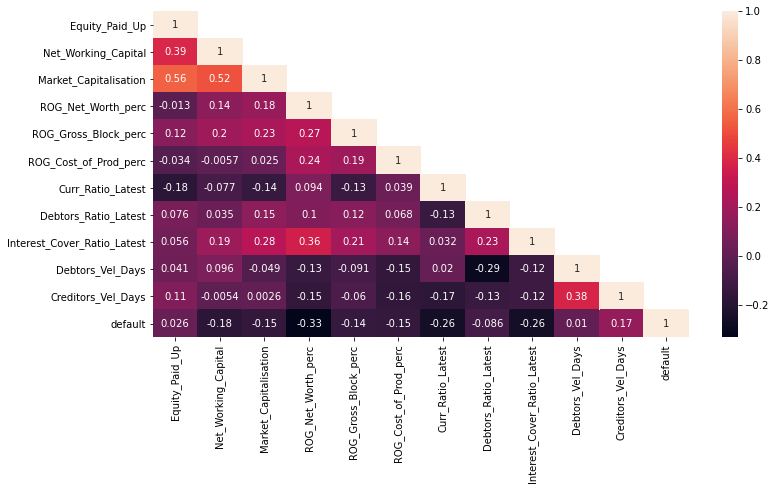

In [880]:
corr = df_new.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True, mask=np.triu(corr,+1))
plt.show()

C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2557: FutureWarni

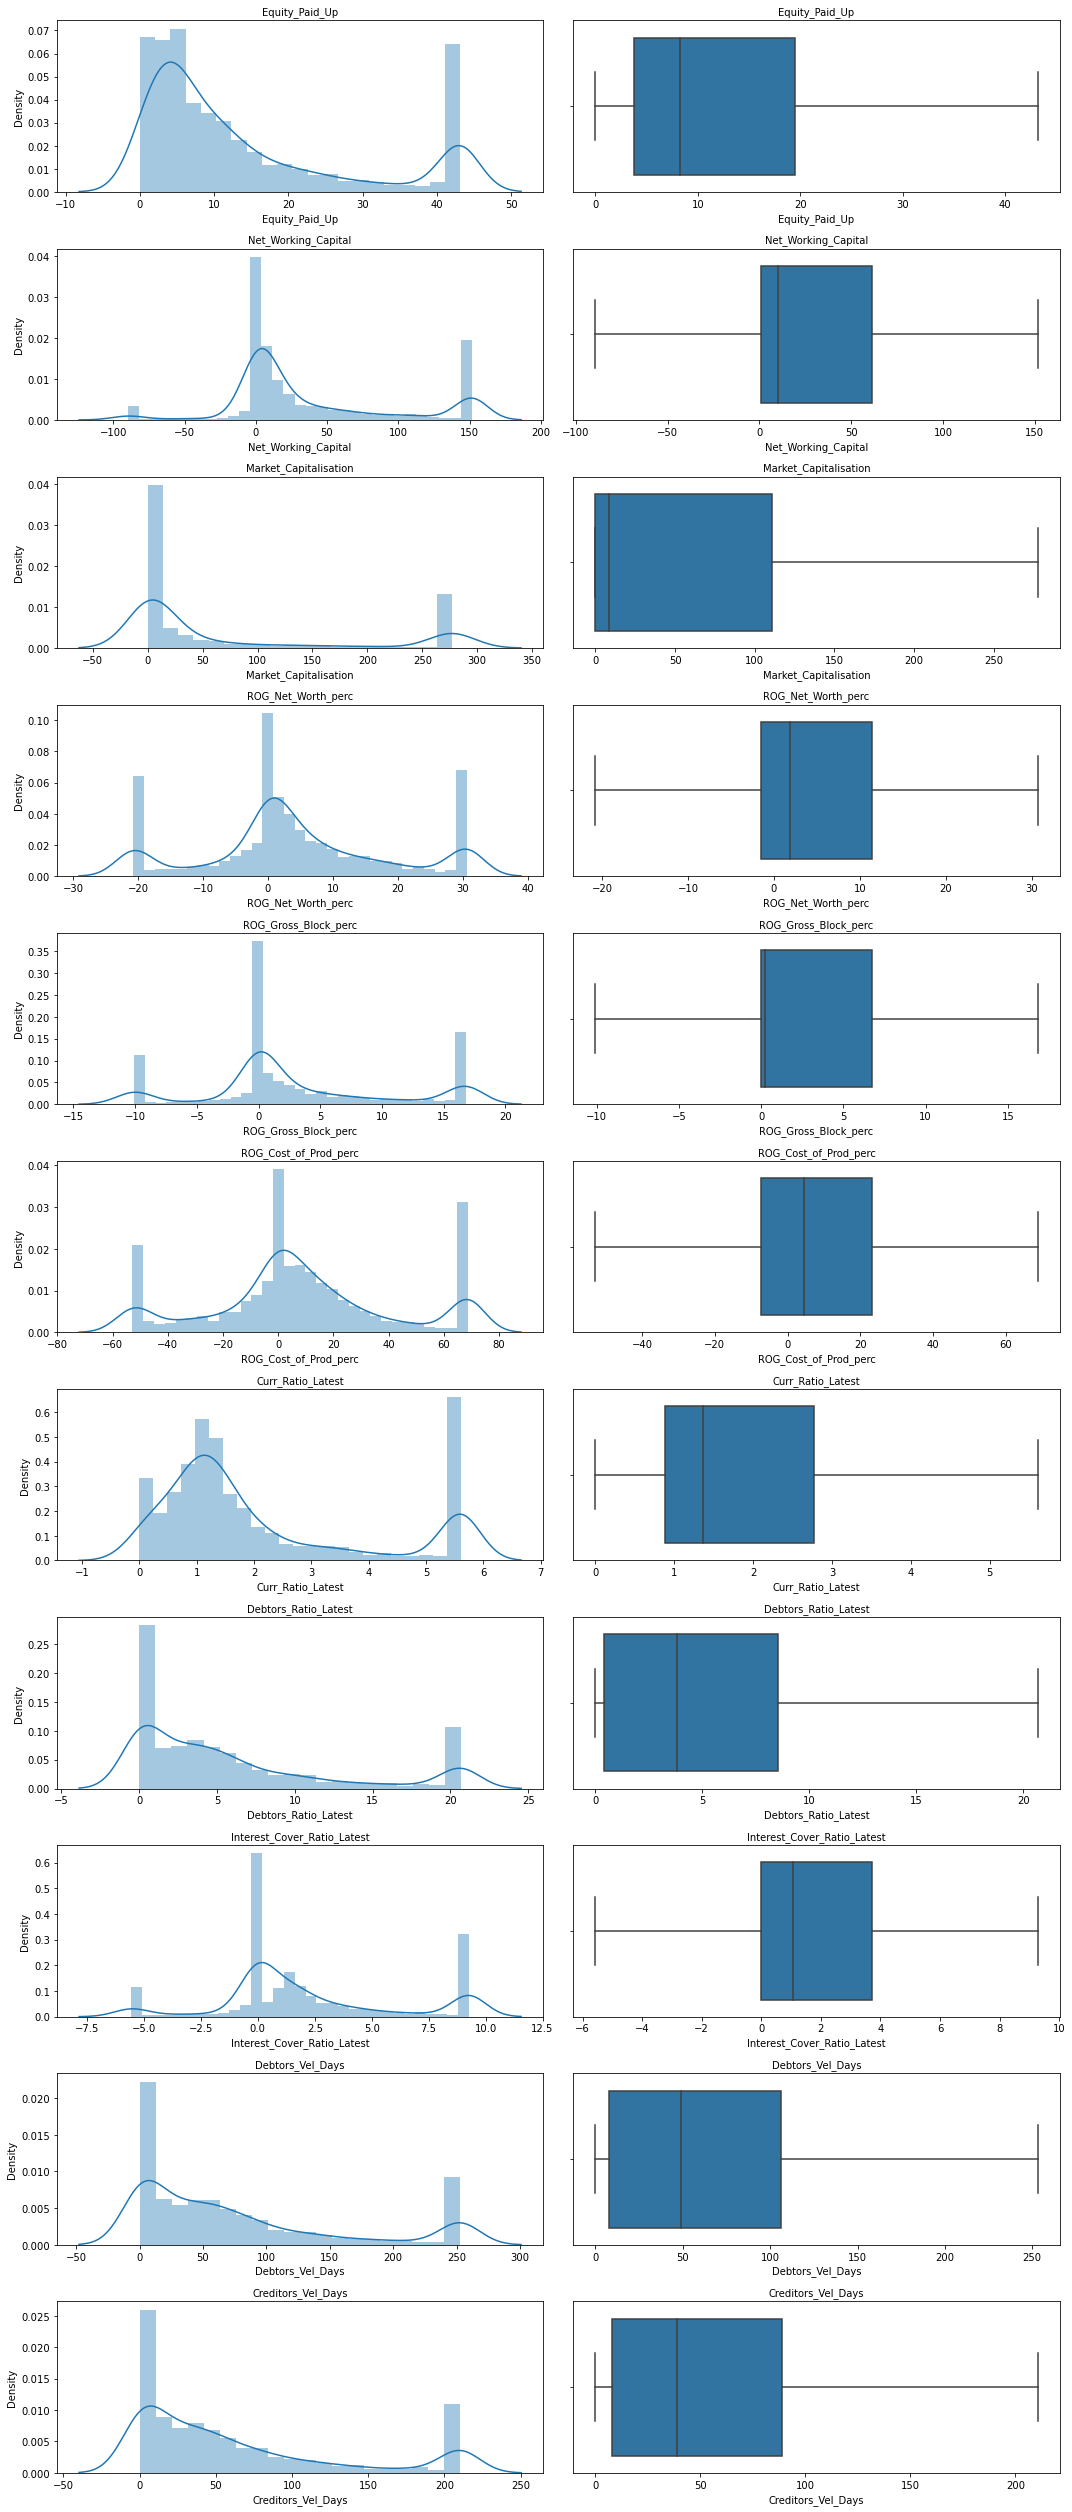

In [881]:
columns = df_new.drop('default', axis=1).columns
fig, axes = plt.subplots(nrows=len(columns),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in columns:
    a = sns.distplot(df_new[i] , ax=axes[count][0])
    title = i
    a.set_title(title,fontsize=10)

    a = sns.boxplot(df_new[i] , orient = "v" , ax=axes[count][1])
    a.set_title(title,fontsize=10)
    
    count+=1

plt.tight_layout()
plt.show()

C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yashs\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

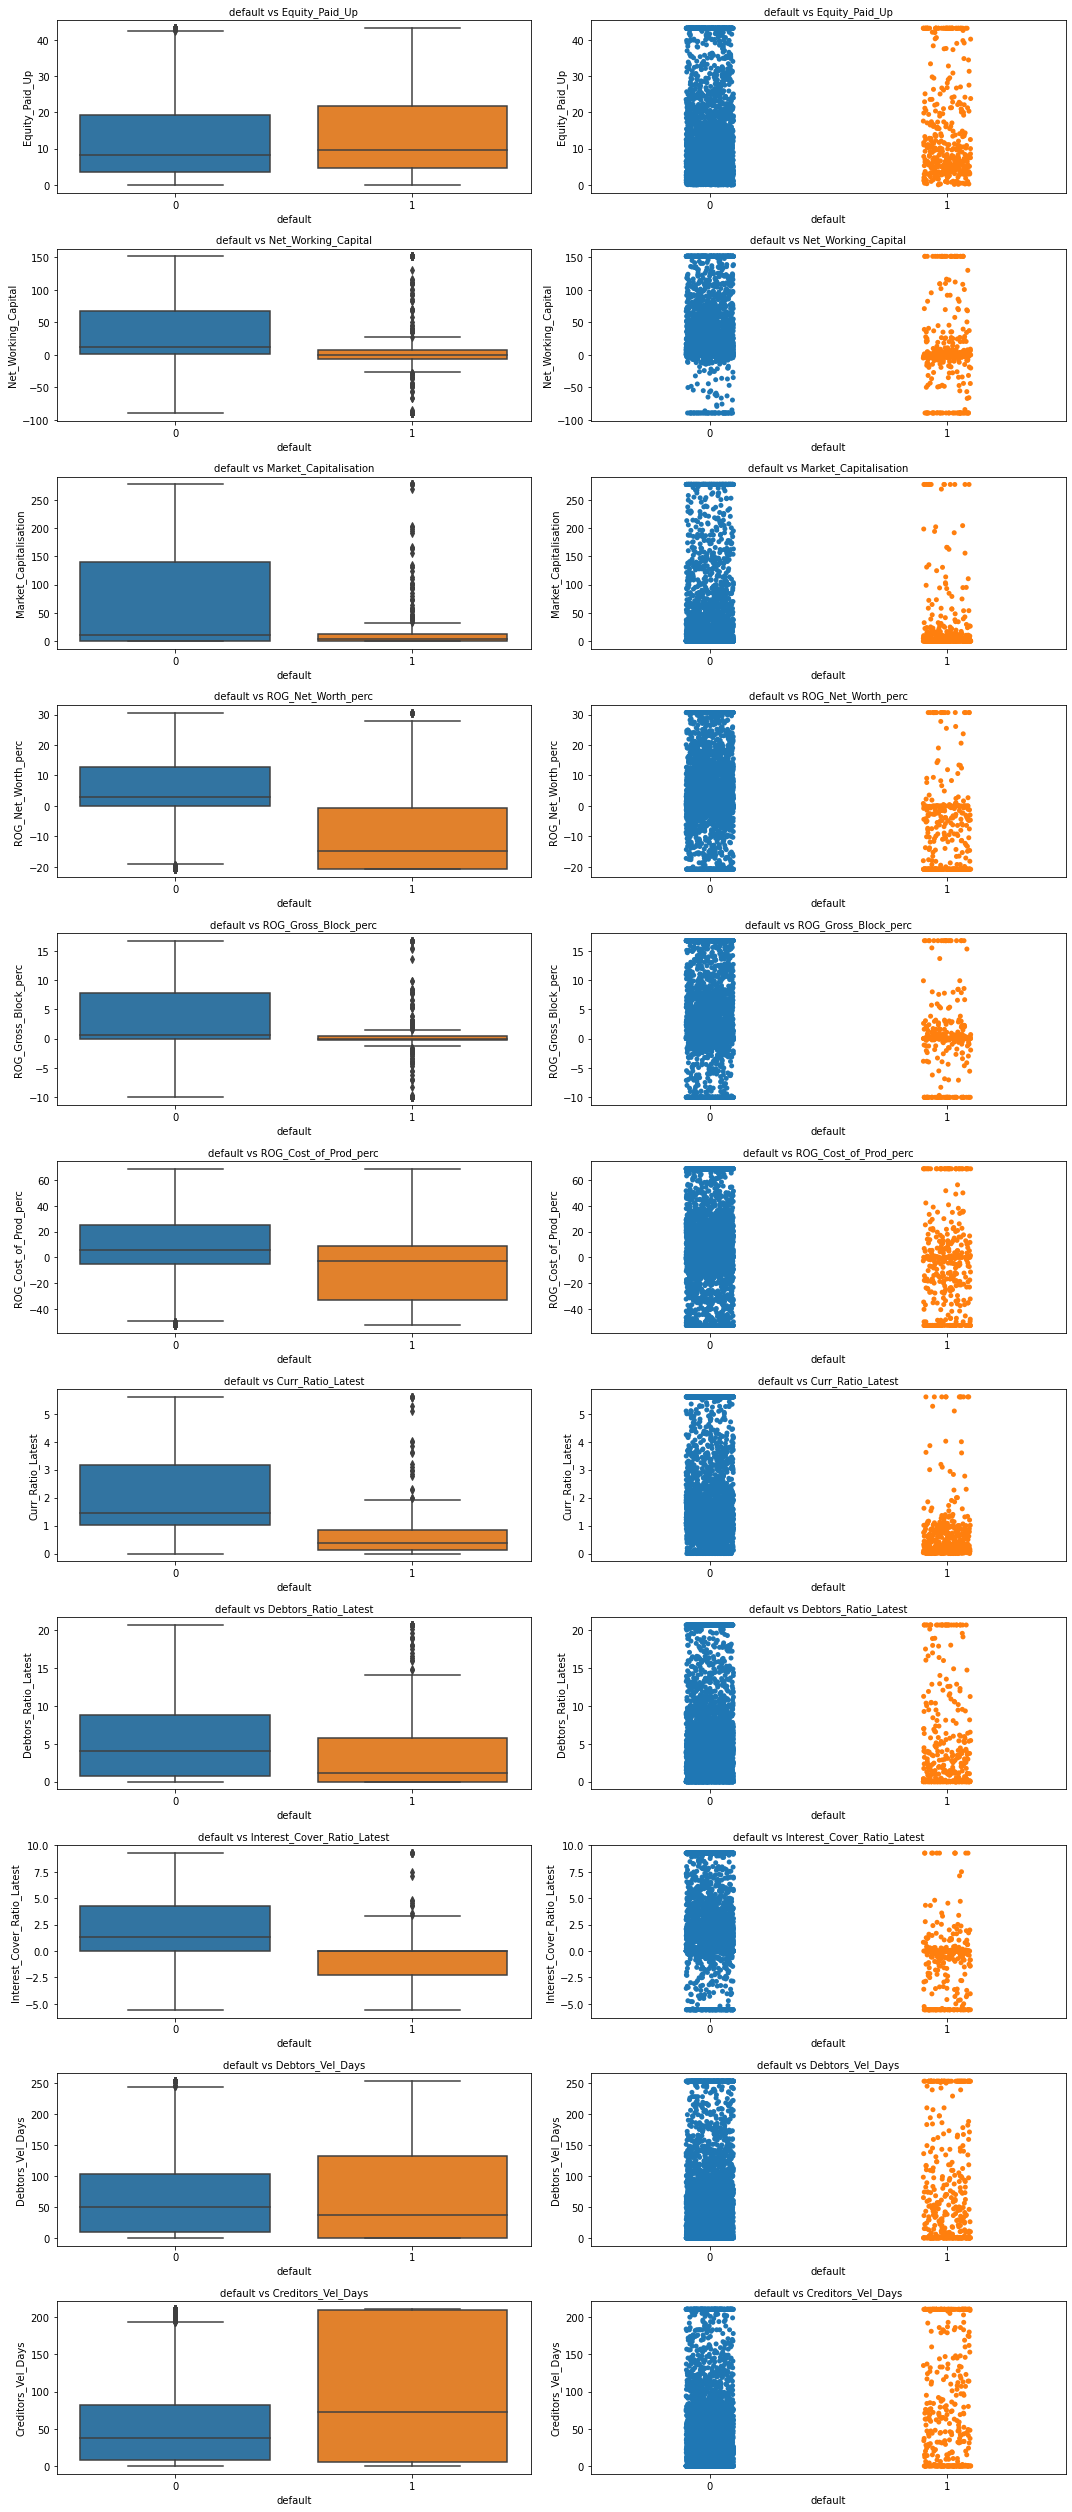

In [882]:
columns = df_new.drop('default', axis=1).columns
fig, axes = plt.subplots(nrows=len(columns),ncols=2)
fig.set_size_inches(15,35)
count = 0
for i in columns:
    a = sns.boxplot(df_new["default"],df_new[i] , ax=axes[count][0])
    title = "default vs " + i
    a.set_title(title,fontsize=10)

    a = sns.stripplot(df_new["default"],df_new[i] , orient = "v" , ax=axes[count][1])
    a.set_title(title,fontsize=10)
    
    count+=1

plt.tight_layout()
plt.show()

#### Insights

In [892]:
for i in df_new.drop(columns=["default"],axis=1).columns:
    print("Descriptive statistics of {} Vs. Non-defaulters".format(i))
    print(df_new.loc[df_new["default"]==0,i].describe())
    print("Descriptive statistics of {} Vs. defaulters".format(i))
    print(df_new.loc[df_new["default"]==1,i].describe())
    print("----")

Descriptive statistics of Equity_Paid_Up Vs. Non-defaulters
count    3198.000000
mean       13.869095
std        13.992411
min         0.000000
25%         3.645000
50%         8.165000
75%        19.150000
max        43.175000
Name: Equity_Paid_Up, dtype: float64
Descriptive statistics of Equity_Paid_Up Vs. defaulters
count    387.000000
mean      15.045336
std       14.082698
min        0.010000
25%        4.620000
50%        9.560000
75%       21.625000
max       43.175000
Name: Equity_Paid_Up, dtype: float64
----
Descriptive statistics of Net_Working_Capital Vs. Non-defaulters
count    3198.000000
mean       40.474673
std        58.635281
min       -89.395000
25%         1.852500
50%        12.270000
75%        67.010000
max       151.525000
Name: Net_Working_Capital, dtype: float64
Descriptive statistics of Net_Working_Capital Vs. defaulters
count    387.000000
mean       6.555401
std       56.583699
min      -89.395000
25%       -5.845000
50%       -0.010000
75%        7.745000
m

#### Insights
1. About 50% of defaulters have less than 0 net working capital
2. About 75% of defaulters have negative rate of growth for net worth as compared to just 25% of non-defaulters having negative
rate of growth for net worth
3. Average number of days required for receiving the payments for non-defaulters is 75 and average number of days required for receiving the payments for non-defaulters is 77. But Average number of days non-defaulters takes to pay suppliers is 58, on the 
other hand average number of days defaulters take to pay suppliers is 94
4. 

#### Model training

In [1066]:
X_training = df_train[sig_features]
Y_training = df_train["default"]
X_testing = df_test[sig_features]
Y_testing = df_test["default"]

In [1067]:
Y_train_pred = model14.predict(X_training)

In [1075]:
Y_class_pred = []
for i in range(0,len(Y_train_pred)):
    if np.array(Y_train_pred)[i]>0.21:
        a=1
    else:
        a=0
    Y_class_pred.append(a)

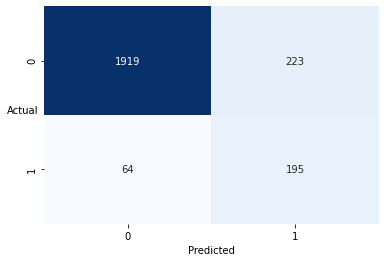

In [1076]:
sns.heatmap(confusion_matrix(Y_training,Y_class_pred),annot=True,fmt="d",cbar=False,cmap="Blues")
plt.ylabel("Actual",rotation=0)
plt.xlabel("Predicted")
df_cm = pd.DataFrame(data=confusion_matrix(Y_training,Y_class_pred),index = ["Actual : 0","Actual : 1"],columns=["Predicted : 0","Predicted : 1"])

In [1071]:
cm=confusion_matrix(Y_training,Y_class_pred)
cm.ravel() #tn,fp,fn,tp

array([2108,   34,  149,  110], dtype=int64)

In [1077]:
df_cm

,Predicted : 0,Predicted : 1
Actual : 0,1919,223
Actual : 1,64,195


In [1078]:
##Recall of positive class
df_cm.iloc[1,1]/(df_cm.iloc[1,1]+df_cm.iloc[1,0])

0.752895752895753

In [1079]:
print(classification_report(Y_training,Y_class_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2142
           1       0.47      0.75      0.58       259

    accuracy                           0.88      2401
   macro avg       0.72      0.82      0.75      2401
weighted avg       0.91      0.88      0.89      2401



#### Choosing the optimal threshold

In [1080]:
from sklearn.metrics import roc_curve

In [1081]:
fpr,tpr,thresholds = roc_curve(Y_training,Y_class_pred)

In [1082]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

1

In [777]:
y_pred_prob = model14.predict()

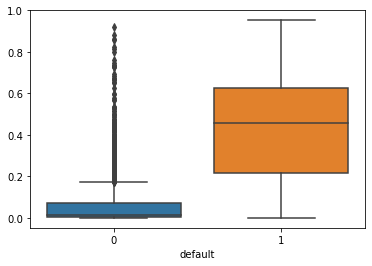

In [778]:
sns.boxplot(x=df_train["default"],y=y_pred_prob)

In [779]:
y_pred_prob.shape

(2401,)

In [765]:
Y_training.shape

(2401,)

### Prediction on the test set

In [780]:
Y_test_pred = model14.predict(X_testing)

In [781]:
Y_class_test_pred = []
for i in range(0,len(Y_test_pred)):
    if np.array(Y_test_pred)[i]>0.21:
        a=1
    else:
        a=0
    Y_class_test_pred.append(a)

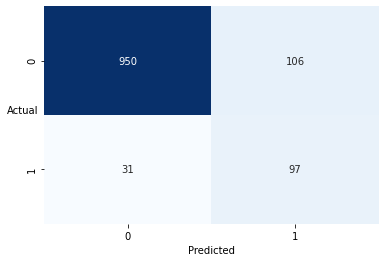

In [783]:
sns.heatmap(confusion_matrix(Y_testing,Y_class_test_pred),annot=True,fmt="d",cbar=False,cmap="Blues")
plt.ylabel("Actual",rotation=0)
plt.xlabel("Predicted")
df_cm = pd.DataFrame(data=confusion_matrix(Y_testing,Y_class_test_pred),index = ["Actual : 0","Actual : 1"],columns=["Predicted : 0","Predicted : 1"])

In [784]:
print(classification_report(Y_testing,Y_class_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1056
           1       0.48      0.76      0.59       128

    accuracy                           0.88      1184
   macro avg       0.72      0.83      0.76      1184
weighted avg       0.92      0.88      0.90      1184

